## Dataset Context

The dataset used in this project is the **TMDB Movie Metadata** dataset from Kaggle. It contains movie-level information originally sourced from *The Movie Database (TMDb)*, a community-driven platform where users contribute and maintain data about films, TV shows, cast, and crew.

The dataset was collected by compiling publicly available metadata from TMDb's API and organizing it into structured CSV files (movies and credits). It includes information such as movie titles, genres, budgets, revenues, descriptions, popularity metrics, cast lists, and crew details.

In [2]:
import pandas as pd
import numpy as np

df_credits=pd.read_csv('archive/tmdb_5000_credits.csv')
df=pd.read_csv('archive/tmdb_5000_movies.csv')

### Data Preprocessing for Large Language Model

#### Raw Data Overview:

In [3]:
df_credits.columns = ['id','title','cast','crew']
df= df.merge(df_credits,on='id')
df['title'] = df['title_x']
df = df.drop(columns=['title_x', 'title_y'])
print("Dataset overview (before cleaning):")
df.head()

Dataset overview (before cleaning):


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter


In [4]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'title'],
      dtype='object')

In [5]:
print("df is unique: ", df['id'].is_unique)
print("df has", len(df), "rows, with", df['id'].nunique(), "unique IDs")
print("df has", df['id'].duplicated().sum(), "duplicate IDs")

if df['id'].duplicated().any():
    print("\ndf duplicate IDs:")
    print(df[df['id'].duplicated(keep=False)].sort_values('id'))


df is unique:  True
df has 4803 rows, with 4803 unique IDs
df has 0 duplicate IDs


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
from collections import Counter

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [7]:
print(f"Shape: {df.shape}")
print(f"\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False))
print(f"\nTarget variable (vote_average) statistics:")
print(df['vote_average'].describe())


Shape: (4803, 22)

Missing values:
homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
revenue                    0
crew                       0
cast                       0
vote_count                 0
vote_average               0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
title                      0
dtype: int64

Target variable (vote_average) statistics:
count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


#### Data Cleaning:
We perform several data cleaning steps to prepare the dataset. First, we drop the `homepage` and `tagline` columns as they contain too many missing values and are not essential for our analysis. Next, we remove rows with missing `overview` since this field is crucial for our model. For `runtime`, we fill missing values with the mean runtime. Finally, we convert `release_date` to datetime format and fill any missing dates with the median release date.


In [8]:
print(f"Original shape: {df.shape}")

df = df.drop(columns=['homepage', 'tagline'])
print(f"After dropping homepage and tagline: {df.shape}")

df = df.dropna(subset=['overview'])
print(f"After dropping rows with missing overview: {df.shape}")

runtime_mean = df['runtime'].mean()
df['runtime'] = df['runtime'].fillna(runtime_mean)
print(f"Filled {df['runtime'].isnull().sum()} missing runtime values with mean: {runtime_mean:.2f}")

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
release_date_median = df['release_date'].median()
df['release_date'] = df['release_date'].fillna(release_date_median)
print(f"Filled {df['release_date'].isnull().sum()} missing release_date values with median: {release_date_median}")

print(f"\nFinal shape: {df.shape}")
print(f"\nRemaining missing values:")
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])


Original shape: (4803, 22)
After dropping homepage and tagline: (4803, 20)
After dropping rows with missing overview: (4800, 20)
Filled 0 missing runtime values with mean: 106.88
Filled 0 missing release_date values with median: 2005-09-30 00:00:00

Final shape: (4800, 20)

Remaining missing values:
Series([], dtype: int64)


#### Create Features:
We create several numerical and categorical features from the JSON-formatted columns. First, we extract count features: `num_genres`, `num_keywords`, `num_production_companies`, `num_production_countries`, `num_spoken_languages`, `num_cast`, and `num_crew` by counting items in each list. Next, we extract the `director` name from the crew list where job equals "Director". Finally, we create `top_cast` which contains the names of the top 3 cast members. These features help capture the scale and key personnel information of each movie.


In [9]:
def safe_parse_json(x):
    if pd.isna(x) or x == '':
        return []
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return x

df['num_genres'] = df['genres'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_keywords'] = df['keywords'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_production_companies'] = df['production_companies'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_production_countries'] = df['production_countries'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_cast'] = df['cast'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)
df['num_crew'] = df['crew'].apply(lambda x: len(safe_parse_json(x)) if safe_parse_json(x) else 0)

def get_director(crew_list):
    if not crew_list:
        return []
    directors = []
    for person in crew_list:
        if person.get('job') == 'Director':
            directors.append(person.get('name'))
    return directors

df['director'] = df['crew'].apply(lambda x: get_director(safe_parse_json(x)))

def get_top_cast(cast_list, n=3):
    if not cast_list:
        return []
    return [actor.get('name', '') for actor in cast_list[:n]]

df['top_cast'] = df['cast'].apply(lambda x: get_top_cast(safe_parse_json(x)))

print(f"Total features: {df.shape[1]}")


Total features: 29


#### Exploratory Data Analysis - Genre Analysis:
We extract the genre list for each movie and analyze the relationship between genres and average ratings. This helps us understand which genres tend to receive higher ratings in the dataset.


=== Average vote_average by Genre ===
genre
History            6.719797
War                6.713889
Drama              6.388197
Music              6.355676
Foreign            6.352941
Animation          6.341453
Documentary        6.285185
Crime              6.274138
Romance            6.207718
Mystery            6.183908
Western            6.178049
Adventure          6.156962
Fantasy            6.096698
Family             6.029630
Thriller           6.010989
Science Fiction    6.005607
Action             5.989515
Comedy             5.945587
TV Movie           5.662500
Horror             5.626590
Name: vote_average, dtype: float64


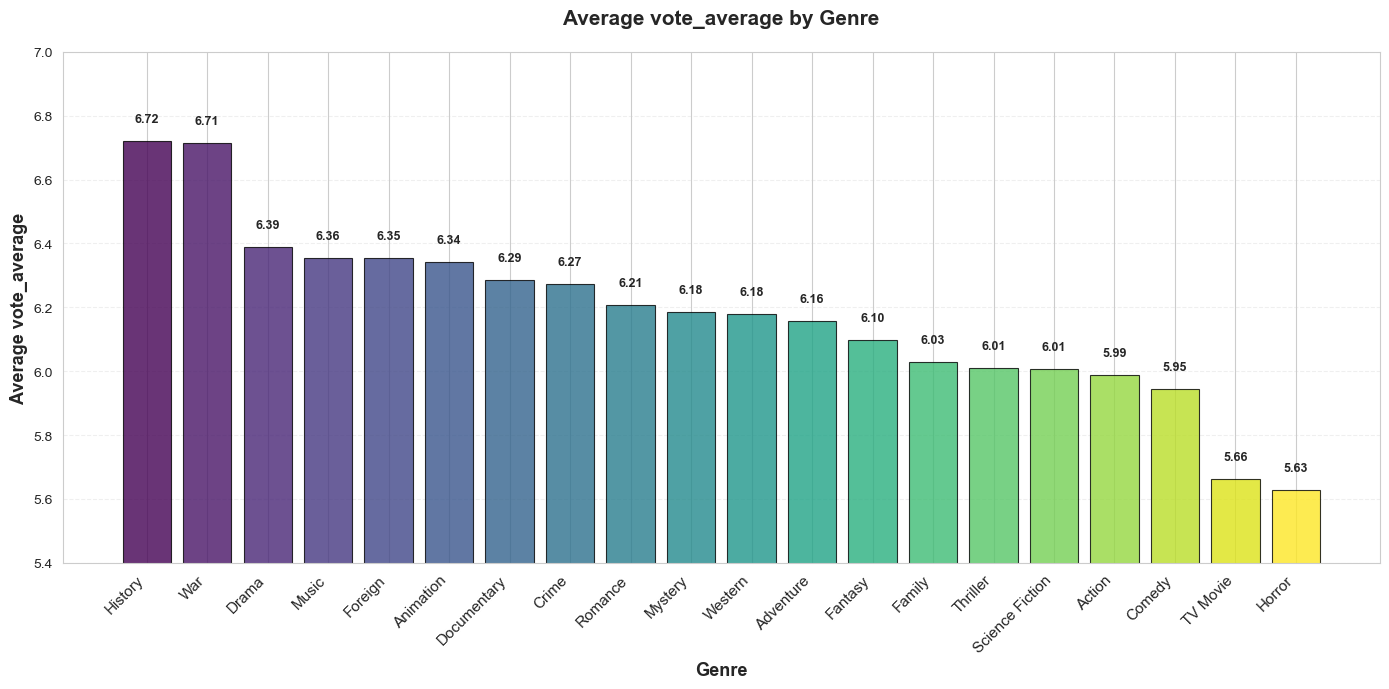

In [10]:
def extract_genres(genres_str):
    genres_list = safe_parse_json(genres_str)
    return [g.get('name', '') for g in genres_list if isinstance(g, dict)]

df['genre_list'] = df['genres'].apply(extract_genres)

all_genres = []
genre_votes = []

for idx, row in df.iterrows():
    genres = row['genre_list']
    vote = row['vote_average']
    for genre in genres:
        all_genres.append(genre)
        genre_votes.append((genre, vote))

genre_df = pd.DataFrame(genre_votes, columns=['genre', 'vote_average'])
genre_avg = genre_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

print("=== Average vote_average by Genre ===")
print(genre_avg)

# Create a more visually appealing plot
plt.figure(figsize=(14, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(genre_avg)))
bars = plt.bar(range(len(genre_avg)), genre_avg.values, color=colors, edgecolor='black', linewidth=0.8, alpha=0.8)

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, genre_avg.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(range(len(genre_avg)), genre_avg.index, rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=13, fontweight='bold')
plt.ylabel('Average vote_average', fontsize=13, fontweight='bold')
plt.title('Average vote_average by Genre', fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(5.4, 7.0)
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis - Language Analysis:
We analyze the relationship between original language and average ratings. We only consider languages with at least 10 movies to ensure statistical reliability.


=== Average vote_average by Original Language (min 10 movies) ===
   language  avg_vote  movie_count
17       ja  7.050000           16
16       it  7.007692           13
18       ko  6.672727           11
8        es  6.659375           32
2        cn  6.500000           12
10       fr  6.430000           70
27       ru  6.354545           11
36       zh  6.300000           27
5        de  6.284615           26
7        en  6.067029         4504
12       hi  6.010526           19


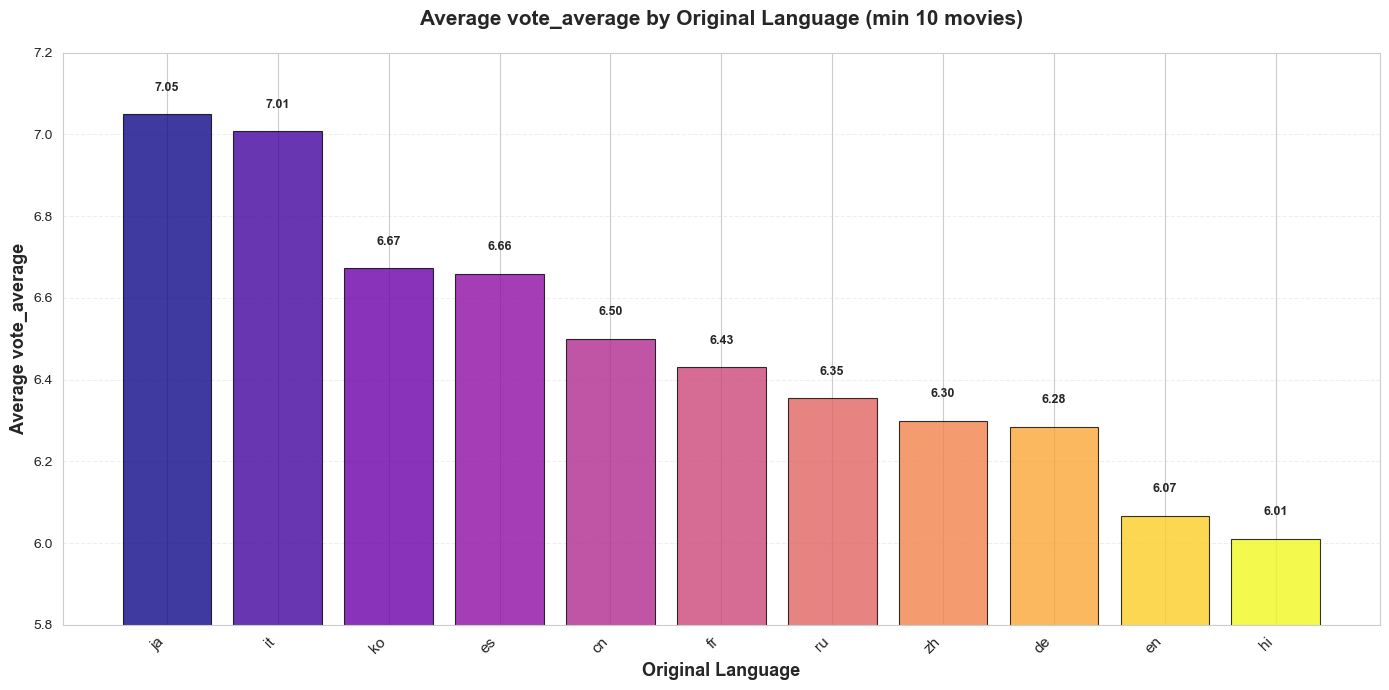

In [19]:
language_stats = df.groupby('original_language').agg({
    'vote_average': ['mean', 'count']
}).reset_index()
language_stats.columns = ['language', 'avg_vote', 'movie_count']
language_stats = language_stats[language_stats['movie_count'] >= 10]  # Languages with at least 10 movies
language_stats = language_stats.sort_values('avg_vote', ascending=False)

print("=== Average vote_average by Original Language (min 10 movies) ===")
print(language_stats)

# Create a more visually appealing plot
plt.figure(figsize=(14, 7))
colors = plt.cm.plasma(np.linspace(0, 1, len(language_stats)))
bars = plt.bar(range(len(language_stats)), language_stats['avg_vote'],
               color=colors, edgecolor='black', linewidth=0.8, alpha=0.8)

# Add value labels on top of bars
for i, (bar, value) in enumerate(zip(bars, language_stats['avg_vote'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(range(len(language_stats)), language_stats['language'],
           rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)
plt.xlabel('Original Language', fontsize=13, fontweight='bold')
plt.ylabel('Average vote_average', fontsize=13, fontweight='bold')
plt.title('Average vote_average by Original Language (min 10 movies)',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(5.8, 7.2)
plt.tight_layout()
plt.show()


#### Exploratory Data Analysis - Pearson Correlation Analysis:
We compute Pearson correlation coefficients between numerical features and the target variable `vote_average`. This helps identify which features have linear relationships with movie ratings and their strength of association.

=== Pearson Correlation with vote_average (sorted) ===
vote_average                1.000000
runtime                     0.375378
num_keywords                0.289158
popularity                  0.274366
num_cast                    0.230449
revenue                     0.197431
num_crew                    0.170978
num_production_companies    0.153951
num_spoken_languages        0.137813
num_production_countries    0.126074
budget                      0.092902
num_genres                  0.085024
Name: vote_average, dtype: float64


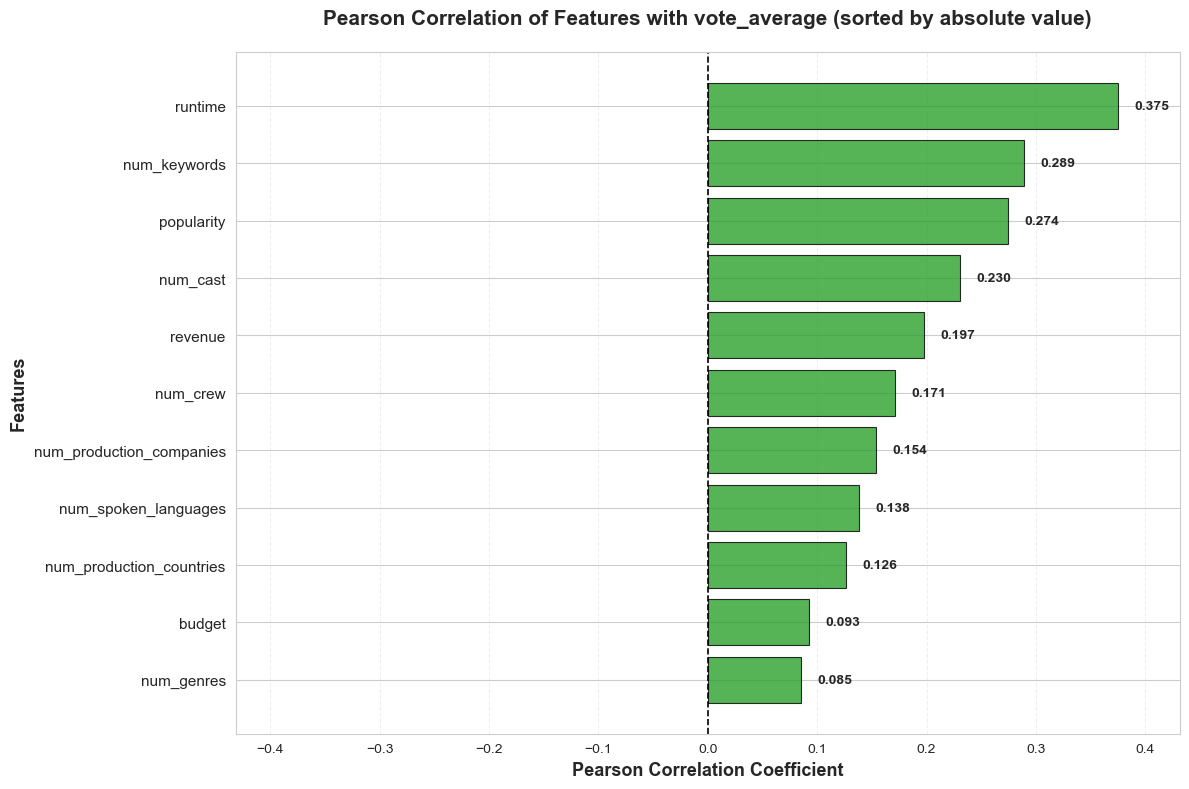

In [25]:
numerical_features = ['budget', 'popularity', 'revenue', 'runtime',
                      'num_genres', 'num_keywords', 'num_production_companies',
                      'num_production_countries', 'num_spoken_languages',
                      'num_cast', 'num_crew', 'vote_average']

corr_df = df[numerical_features].corr() # pearson correlation

vote_corr = corr_df['vote_average'].sort_values(ascending=False)
print("=== Pearson Correlation with vote_average (sorted) ===")
print(vote_corr)

# Create a more visually appealing plot - sort by absolute value to show strongest correlations first
vote_corr_without_self = vote_corr.drop('vote_average')
# Sort by absolute value descending, then reverse for barh (strongest on top)
vote_corr_sorted = vote_corr_without_self.reindex(vote_corr_without_self.abs().sort_values(ascending=False).index)[::-1]

plt.figure(figsize=(12, 8))
colors = ['#d62728' if x < 0 else '#2ca02c' for x in vote_corr_sorted.values]
bars = plt.barh(range(len(vote_corr_sorted)), vote_corr_sorted.values,
                color=colors, edgecolor='black', linewidth=0.8, alpha=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, vote_corr_sorted.values)):
    plt.text(value + (0.015 if value >= 0 else -0.015), bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', ha='left' if value >= 0 else 'right', va='center',
             fontsize=10, fontweight='bold')

plt.yticks(range(len(vote_corr_sorted)), vote_corr_sorted.index, fontsize=11)
plt.xticks(fontsize=10)
plt.xlabel('Pearson Correlation Coefficient', fontsize=13, fontweight='bold')
plt.ylabel('Features', fontsize=13, fontweight='bold')
plt.title('Pearson Correlation of Features with vote_average (sorted by absolute value)',
          fontsize=15, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.2)
plt.grid(axis='x', alpha=0.3, linestyle='--')
# Set xlim to accommodate both positive and negative values
x_max = max(abs(vote_corr_sorted.min()), abs(vote_corr_sorted.max()))
plt.xlim(-x_max * 1.15, x_max * 1.15)
plt.tight_layout()
plt.show()

All features show positive correlations with vote_average, indicating that higher values in these features are generally associated with higher movie ratings. Runtime shows the strongest positive correlation (0.375), suggesting that longer movies tend to receive better ratings. Content richness indicators (num_keywords, num_cast, num_crew) also show moderate positive correlations, while budget and num_genres have weaker associations.

#### Exploratory Data Analysis - Spearman Correlation Analysis:
We compute Spearman correlation coefficients to measure monotonic relationships between features and ratings. Unlike Pearson correlation, Spearman can capture non-linear monotonic relationships and is less sensitive to outliers.

=== Spearman Correlation with vote_average (sorted) ===
vote_average                1.000000
runtime                     0.398553
popularity                  0.360048
num_keywords                0.327981
num_cast                    0.251736
revenue                     0.244019
num_crew                    0.218832
num_spoken_languages        0.121770
num_production_companies    0.112234
num_production_countries    0.099928
budget                      0.066114
num_genres                  0.023319
Name: vote_average, dtype: float64


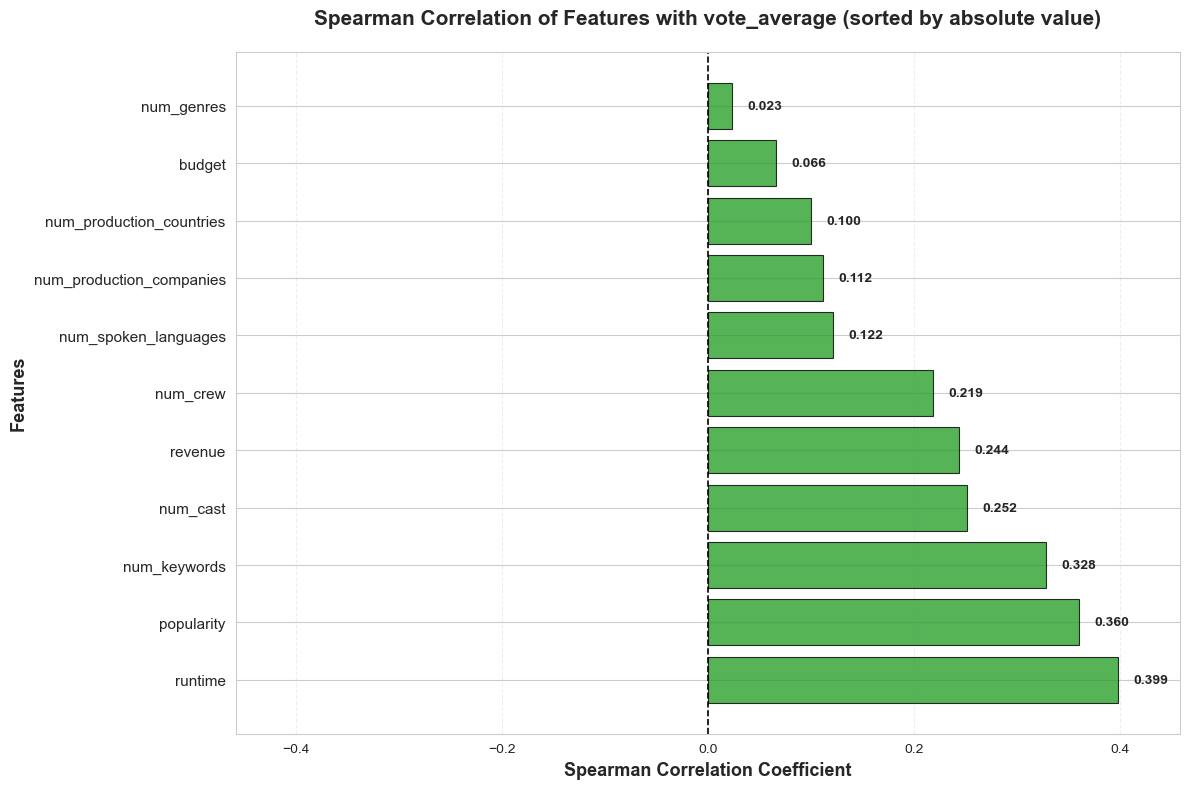

In [23]:
numerical_features = ['budget', 'popularity', 'revenue', 'runtime',
                      'num_genres', 'num_keywords', 'num_production_companies',
                      'num_production_countries', 'num_spoken_languages',
                      'num_cast', 'num_crew', 'vote_average']

corr_df = df[numerical_features].corr(method='spearman') # spearman correlation

vote_corr = corr_df['vote_average'].sort_values(ascending=False)
print("=== Spearman Correlation with vote_average (sorted) ===")
print(vote_corr)

# Create a more visually appealing plot - sort by absolute value to show strongest correlations first
vote_corr_without_self = vote_corr.drop('vote_average')
vote_corr_sorted = vote_corr_without_self.reindex(vote_corr_without_self.abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 8))
colors = ['#d62728' if x < 0 else '#2ca02c' for x in vote_corr_sorted.values]
bars = plt.barh(range(len(vote_corr_sorted)), vote_corr_sorted.values,
                color=colors, edgecolor='black', linewidth=0.8, alpha=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, vote_corr_sorted.values)):
    plt.text(value + (0.015 if value >= 0 else -0.015), bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', ha='left' if value >= 0 else 'right', va='center',
             fontsize=10, fontweight='bold')

plt.yticks(range(len(vote_corr_sorted)), vote_corr_sorted.index, fontsize=11)
plt.xticks(fontsize=10)
plt.xlabel('Spearman Correlation Coefficient', fontsize=13, fontweight='bold')
plt.ylabel('Features', fontsize=13, fontweight='bold')
plt.title('Spearman Correlation of Features with vote_average (sorted by absolute value)',
          fontsize=15, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.2)
plt.grid(axis='x', alpha=0.3, linestyle='--')
# Set xlim to accommodate both positive and negative values
x_max = max(abs(vote_corr_sorted.min()), abs(vote_corr_sorted.max()))
plt.xlim(-x_max * 1.15, x_max * 1.15)
plt.tight_layout()
plt.show()

Spearman correlation results show that all features have positive monotonic relationships with vote_average. Runtime (0.399) and popularity (0.360) demonstrate the strongest associations, while content richness features (num_keywords, num_cast, num_crew) show moderate positive correlations. The pattern is consistent with Pearson correlation, confirming robust relationships between these features and movie ratings. Budget and num_genres have the weakest associations, suggesting limited predictive value.

#### Prepare Final Text Input for Large Language Model Input:
We convert each movie's structured data into a formatted text string that serves as input for the language model. This text includes key information such as title, budget, revenue, runtime, popularity, keywords, genres, cast, director, production details, and overview. The structured format allows the model to process all relevant features as natural language, enabling it to learn patterns and relationships for predicting movie ratings.

In [16]:
def extract_name_list(obj, key="name"):
    if not obj:
        return []
    return [d.get(key, "") for d in obj if isinstance(d, dict) and d.get(key)]

def row_to_text(row):
    title = row.get("title", "")

    kw_list = extract_name_list(safe_parse_json(row["keywords"]))
    keywords_text = ", ".join(kw_list) if kw_list else "None"

    prod_companies_list = extract_name_list(safe_parse_json(row["production_companies"]))
    prod_companies_text = ", ".join(prod_companies_list) if prod_companies_list else "None"

    prod_countries_list = extract_name_list(safe_parse_json(row["production_countries"]))
    prod_countries_text = ", ".join(prod_countries_list) if prod_countries_list else "None"

    cast_list = extract_name_list(safe_parse_json(row["cast"]))
    cast_text = ", ".join(cast_list[:10]) if cast_list else "None"

    directors = row.get("director", []) or []
    if isinstance(directors, str):
        directors = [directors]
    director_text = ", ".join(directors) if directors else "None"

    genres = row.get("genre_list", []) or []
    genres_text = ", ".join(genres) if genres else "None"

    return (
        f"Title: {title}\n"
        f"Budget: {row['budget']}, revenue: {row['revenue']}, "
        f"runtime: {row['runtime']} minutes, popularity: {row['popularity']}.\n"
        f"Keywords: {keywords_text}.\n"
        f"Original language: {row['original_language']}.\n"
        f"Status: {row['status']}.\n"
        f"Genres: {genres_text}.\n"
        f"Cast: {cast_text}.\n"
        f"Director: {director_text}.\n"
        f"Production companies: {prod_companies_text}.\n"
        f"Production countries: {prod_countries_text}.\n"
        f"Number of cast: {row['num_cast']}, "
        f"number of crew: {row['num_crew']}, "
        f"Overview: {row['overview']}\n"
    )

df["lm_input"] = df.apply(row_to_text, axis=1)

In [17]:
max([len(x) for x in df["lm_input"]])

2200